# continuacion en la **matriz de confusion**
En la clase anterior vimos varios ejemplos donde los casos etiquetados con "F" tenian distino valor:
* Pronostico de diabeters (o cancer), $FN$ el peor
* Spam email (mensajes basura), $FP$ el peor

Comenzamos la clase con otro ejemplo de una sola muestra donde
los $FP$ y $FN$ pueden tener importancias relativas.

**Ejemplo**: Este es interesante por que hay una sola muestra $m=1$. Considere la siguiente situacion. Usted recibe una llamada donde dice que se gano un premio, pero que para reclamarlo debe dar sus datos bancarios. Lo haria si? no? por
que? cuales serian las posibles consecuencias.



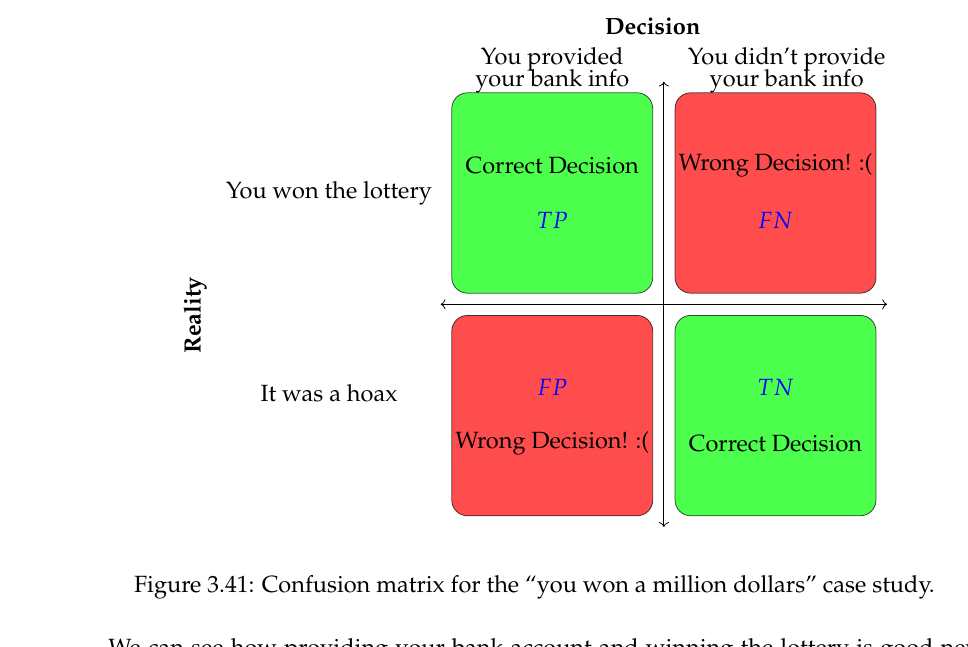

## Cuantificacion de la matriz de confusion.

**Ejemplo 2:**: Spam email (email basura).
La siguiente grafica muestra una matriz de confusion $2 \times 2$

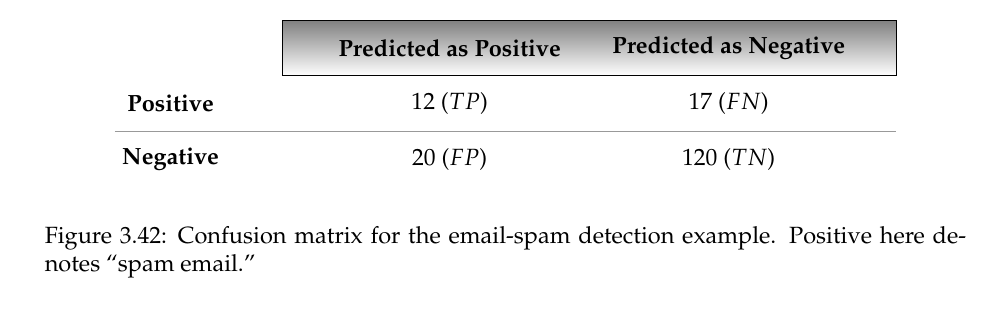

La primera merica (metrics) que definiremos es el "accuracy" (exactitud). Es la suma de la diagonal divido por $m$

$$\text{accuracy} = \frac{12 + 120 }{12+120+ 20+17}=0.78 $$

El 78%.

El "accuracy" es bueno cuando hay balance entre las muestras. Veamos donde el "accuracy" falla.

**Ejemplo 3**: Observe la siguiente matriz de confusion.


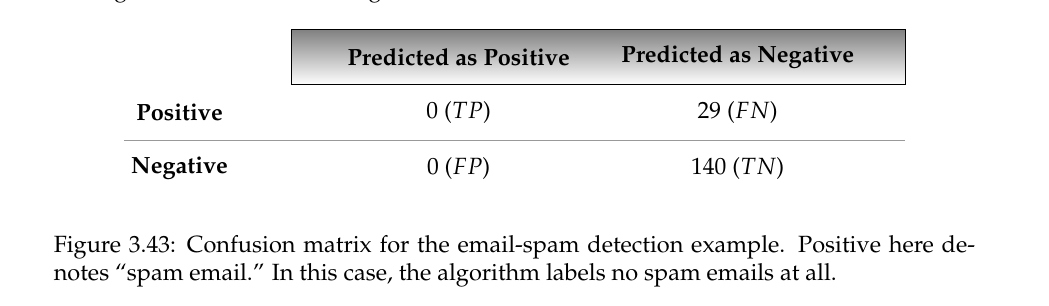

Mi programa de ML predice que no hay muestras positivas. Todas negativas. Todos los emails son buenos.

Que "accuracy" tiene este ejmplo?

$$\text{accuracy} = \frac{140}{169} = 0.828 $$
El "accuracy" es del 82%. :(

Esta metrica en este caso no es confiable.
Definamos nuevas metricas.

**Defincion:** (precision)
La precision se define con la formula.

$$\text{precision} = \frac{TP}{TP+FP} $$
El $TP$ (el elemento $(1,1)$ dividido la suma de la columna.

Si calculamos la precision en la matriz de confusion anterior vemos que

$$ \text{precision} = \frac{0}{0 + \epsilon}=0  $$

Vovamos al ejemplo (2).




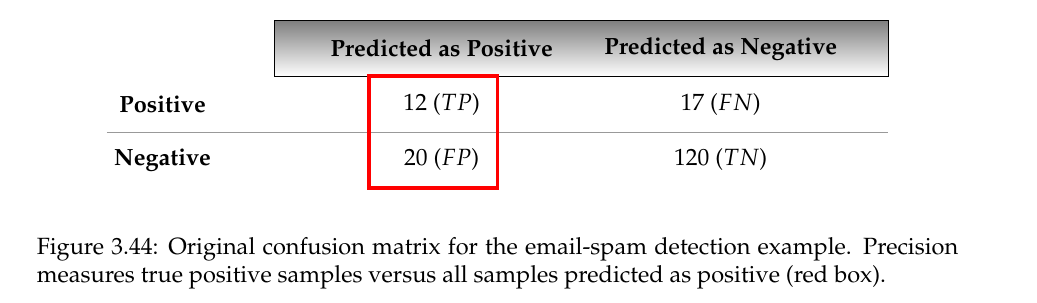

Segun la definicion
$$\text{precision} = \frac{12}{32} = 0.375 $$
es el 37%.

Otros nombres para precision son TPR (True Positive Rate) o Sensitivity (Sensitividad).

**Definicion** (recall)

$$\text{recall} = \frac{TP}{TP+FN} $$

Vemos dos medidas nuevas llamadas **precision** (sensitivity o TPR) y **recall** (True Negattive Rage).
Se usan de acuerdo que lo que se quiera. Si en un banco yo prefiero falsos positivos me voy con precision que me da un numero mas pequenho, pero si es un diagnostico de cancer me voy con recall.

Si los dos son similares no importa cual esoja, pero puede pasar que halla un desbalance y que una sea mas grand que el otro (significativamente). En este caso es mejor calcular un promedio de los dos. El promedio Pitagorico mas pequenhno es la media armonica.

Hay cuatro medias pitagoricas.



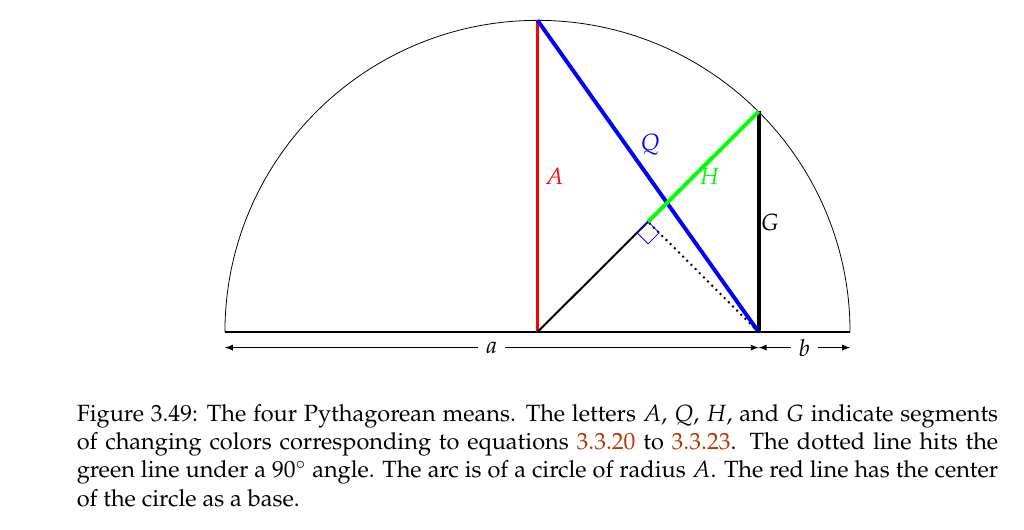

La media armonica (que es la mas pequena de las 4 medias pitagoricas) se denomina F1 Score

$$F_1 = \left (  \frac{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}{2} \right )^{-1} $$

La siguiente metrica se llama AUC-ROC.
El ROC: Receiver Characteristi Curve. Es muy versatil, se invento durante la segunda guerra mundial para evaluar la precision en radares.


Como se construye el ROC?
Se define FPR: False Positive Rate

$$FPR = \frac{FP}{FP + TN} $$

* Es una curva parametrica. El parametro es el umbral $\gamma$.
Podemos variar el umbral entre $0$ y $1$.
* Los ejes son: El eje $x$ es $FPR$ (recall), el eje ye es $TPR$ (sensitiviy o precision)
* Esta curva tiene la flexibilidad de incluir un **continuo** de matrices de confusion. Una por cada $\gamma$.
Veamos como se construye la curva ROC.

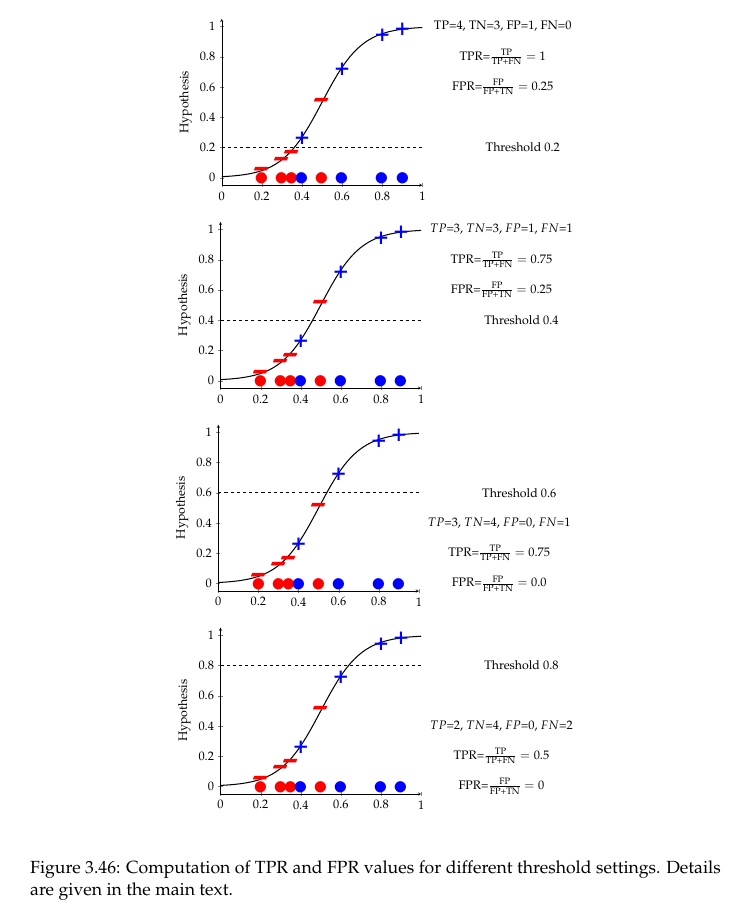

Que pasa si $\gamma=0$?
Todo lo que este por encima es positivo. Todas las cruces estan por encima de 0. $TP=4$. $FP=4$, $TN=0$, $FN=0$
Entonces

$$\text{TPR} = \frac{TP}{TP + FN} = 1  $$
$$\text{FPR} = \frac{FP}{FP + TN} = 1  $$


El ultimo caso es cuando $\gamma=1$. Todo esta por debajo.
$TP=0$, $TN=4$, $FP=0$, $FN=4$.

$$\text{TPR} = \frac{TP}{TP + FN} = 0  $$
$$\text{FPR} = \frac{FP}{FP + TN} = 0  $$

los puntos encontrados.

$$(1,1), (0.25,1), (0.25, 0.75), (0, 0.75), (0, 0.5), (0,0) $$

Graficamos lo puntos.

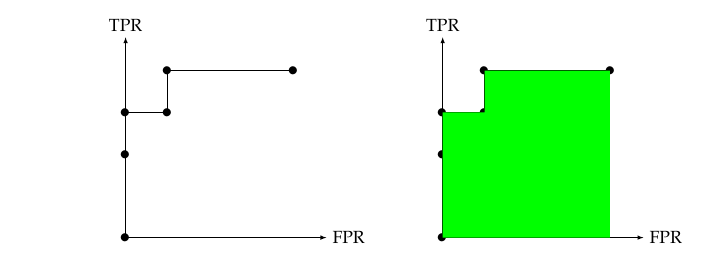

El area bajo la curva es

$$AUC = 1 - (0.25)^2 = 0.9375 $$
ABC= Area Bajo la Curva.

Varios puntos
* Que ventaja presenta el ROC: Tiene un continuo (muchas) de matrices de confusion. $\gamma \in [0, 1]$. Tiene muchos problemas en uno.
* Como sabemos si el ROC es bueno o no? Cuando los puntos estan por encima de la diagonal. Por que en $y$ estan los TPR y en la $x$ los FPR. Queremos $y>x$ por que queremos que $TPR > FPR$.

* Otra medida. El AUC (ABC), entre mas cerca a 1 mejor. Si es $1$ significa perfeccion.

Veamos un ejemplo en Python

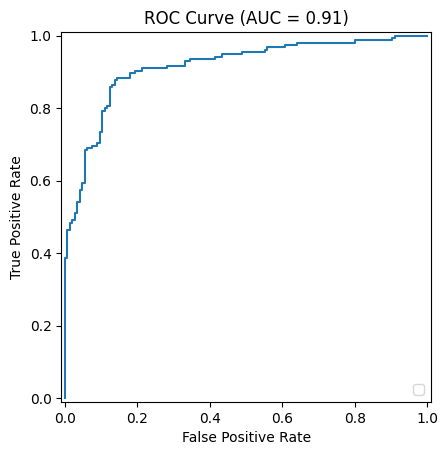

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Step 1: Create a simple dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a classifier (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Get the predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 5: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 6: Plot the ROC curve using RocCurveDisplay
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

# Optionally, add an AUC score
roc_auc = auc(fpr, tpr)
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')

plt.show()


## Matriz de confusion para mas de dos clases.


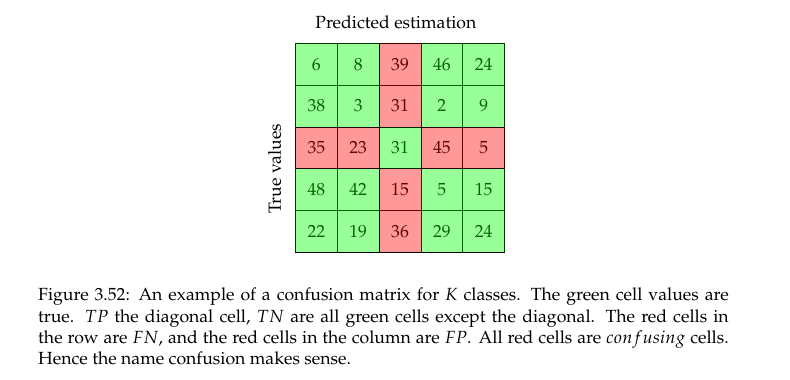

La matriz de confusion de arriba tiene 31 TP (en el medio).
Los FN : 35,23, 45, 5, los FP= 39,31, 15, 36 y el resto son TN.

La medida mas simple es "accuracy"
Si $\ell_{ij}$ es el valor la fila $i$ columna $j$ de la matriz de confusion entonces

$$\text{accuracy} = \frac{\sum_{i=1}^K \ell_{ii}}{m} $$

Es mejor tener todos los FP, FN, TP, TN

Contemos

Para la clase $i$: ($i$ puede valer $1,2, \cdots, K$

$$ TP_i = \ell_{ii} \quad \text{diagonal} $$
$$ FP_i = \sum_{l=1}^K \ell_{li} - TP_i $$
$$ FN_i = \sum_{l=1}^K \ell_{il} - TP_i $$
$$ TN_i = \sum_{i=1}^K \sum_{j=1}^K - TP_i - FP_i - FN_i $$
$$ TN_i = m - TP_i - FP_i - FN_i $$

Una vez se tenga esto para cada clase, se tiene
accuracy, precision, recall (TPR), TNR, FPR, ROC, AUC.
pero **para cada clase $i$**

# Proxima clase ANN:
Artificial Neural Networks (Redes Neuronales Artificiales).